# Exploring Dandiset 000563: Allen Institute Openscope - Barcoding

> **Note:** This notebook was generated with the assistance of AI. Please be cautious when interpreting the code or results.

## Overview

This notebook explores [Dandiset 000563](https://dandiarchive.org/dandiset/000563/0.250311.2145), which contains Neuropixels recordings from the Allen Institute's Openscope platform. The dataset focuses on "temporal barcoding" - the precise timing patterns of neural responses to visual white noise stimuli that look like barcodes when visualized as rasters.

The recordings include responses from neurons throughout the mouse visual system to full-field flicker and static grating stimuli modulated by white noise sequences. This data enables investigation of temporal precision in neural coding across different brain regions.

In this notebook, we will:
1. Explore the dandiset metadata
2. List and examine the available NWB files
3. Load and examine LFP data from a specific recording
4. Visualize electrode locations and LFP signals
5. Explore the structure of the NWB files

## Required Packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from dandi.dandiapi import DandiAPIClient
import pynwb
import h5py
import remfile
import seaborn as sns

# Set plotting style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_context("notebook", font_scale=1.2)

## Exploring the Dandiset Metadata

In [2]:
# Connect to the DANDI API and get the dandiset
client = DandiAPIClient()
dandiset = client.get_dandiset("000563", "0.250311.2145")
metadata = dandiset.get_raw_metadata()

# Display basic information about the dandiset
print(f"Dandiset name: {metadata['name']}")
print(f"Dandiset URL: {metadata['url']}")
print(f"DOI: {metadata['doi']}")
print(f"Version: {metadata['version']}")
print(f"License: {', '.join(metadata['license'])}")

Dandiset name: Allen Institute Openscope - Barcoding
Dandiset URL: https://dandiarchive.org/dandiset/000563/0.250311.2145
DOI: 10.48324/dandi.000563/0.250311.2145
Version: 0.250311.2145
License: spdx:CC-BY-4.0


Let's examine the description of this dataset to understand its purpose and content:

In [3]:
print(metadata['description'])

Some visual neurons have been shown to respond to white noise flicker visual stimuli with high temporal precision, particularly retinal ganglion cells and LGN relay cells. Responses to white noise stimulation are useful for a variety of analyses, including information theoretic measures and generative models of precise spike timing. However the literature was lacking data on responses to white noise in cortical visual areas, or in the visual stream flowing through the superior colliculus.

This experiment used the OpenScope Neuropixels passive viewing protocol, and displayed visual stimuli modulated in time by a short, repeated white noise sequence. The visual stimulus was either a spatially uniform field whose luminance was modulated in time (Full Field Flicker), or a standing sinusoidal grating whose contrast was modulated in time (Static Gratings). Perhaps surprisingly, most cortical visual neurons responded well to full-field flicker white noise.  To obtain large populations of neu

Let's see who contributed to this dataset:

In [4]:
# Extract author names from contributors
authors = [contributor['name'] for contributor in metadata['contributor'] 
           if 'roleName' in contributor and 'dcite:Author' in contributor['roleName']]
print("Authors:")
for author in authors:
    print(f"- {author}")

Authors:
- Reinagel, Pamela
- Lecoq, Jérôme


Let's look at the keywords to understand the main themes of this dataset:

In [5]:
print("Keywords:")
for keyword in metadata['keywords']:
    print(f"- {keyword}")

Keywords:
- mouse
- neuropixel
- extracellular electrophysiology
- neocortex
- excitatory
- inhibitory
- barcoding
- temporal
- precision


## Exploring the Files in the Dandiset

In [6]:
# List the first 10 assets in the dandiset
assets = list(dandiset.get_assets())[:10]
for asset in assets:
    print(f"{asset.path} ({asset.size / 1e6:.1f} MB)")

sub-699241/sub-699241_ses-1318772854_probe-1_ecephys.nwb (2083.5 MB)
sub-699241/sub-699241_ses-1318772854_probe-3_ecephys.nwb (2056.4 MB)
sub-699241/sub-699241_ses-1318772854_probe-4_ecephys.nwb (1920.4 MB)
sub-699241/sub-699241_ses-1318772854_probe-0_ecephys.nwb (2091.9 MB)
sub-699241/sub-699241_ses-1318772854_ogen.nwb (2828.8 MB)
sub-699241/sub-699241_ses-1318772854_probe-2_ecephys.nwb (1859.0 MB)
sub-699846/sub-699846_ses-1314466742_probe-1_ecephys.nwb (1954.5 MB)
sub-699846/sub-699846_ses-1314466742_probe-2_ecephys.nwb (2049.2 MB)
sub-699846/sub-699846_ses-1314466742_probe-4_ecephys.nwb (2050.9 MB)
sub-699846/sub-699846_ses-1314466742_probe-3_ecephys.nwb (2044.9 MB)


Let's examine the structure of the file paths to understand how the data is organized:

In [7]:
# Get all asset paths
all_assets = list(dandiset.get_assets())
all_paths = [asset.path for asset in all_assets]

# Print unique subjects
subjects = sorted(list(set([path.split('/')[0] for path in all_paths])))
print(f"Number of subjects: {len(subjects)}")
print("Subject IDs:", subjects[:5], "..." if len(subjects) > 5 else "")

# Count the number of different file types
file_types = {}
for path in all_paths:
    if '_' in path and '.' in path:
        file_type = path.split('_')[-1].split('.')[0]
        file_types[file_type] = file_types.get(file_type, 0) + 1

print("\nFile types:")
for file_type, count in file_types.items():
    print(f"- {file_type}: {count} files")

Number of subjects: 14
Subject IDs: ['sub-681446', 'sub-682745', 'sub-685263', 'sub-688546', 'sub-691524'] ...

File types:
- ecephys: 80 files
- ogen: 14 files


Let's look at the files for one subject to understand the structure:

In [8]:
# Show files for the first subject
subject_id = subjects[0]
subject_files = [path for path in all_paths if path.startswith(subject_id)]
print(f"Files for subject {subject_id}:")
for file in subject_files:
    print(f"- {file}")

Files for subject sub-681446:
- sub-681446/sub-681446_ses-1290510496_probe-4_ecephys.nwb
- sub-681446/sub-681446_ses-1290510496_probe-2_ecephys.nwb
- sub-681446/sub-681446_ses-1290510496_probe-1_ecephys.nwb
- sub-681446/sub-681446_ses-1290510496_ogen.nwb
- sub-681446/sub-681446_ses-1290510496_probe-3_ecephys.nwb
- sub-681446/sub-681446_ses-1290510496_probe-0_ecephys.nwb


## Loading and Exploring an NWB File

Let's load one of the NWB files to explore its structure. We'll use the file `sub-699241/sub-699241_ses-1318772854_probe-1_ecephys.nwb`.

In [9]:
# Load a specific NWB file
file_path = "sub-699241/sub-699241_ses-1318772854_probe-1_ecephys.nwb"
asset = next(dandiset.get_assets_by_glob(file_path))
url = asset.download_url

# Open the file using remfile and h5py to stream it without downloading
remote_file = remfile.File(url)
h5_file = h5py.File(remote_file)
io = pynwb.NWBHDF5IO(file=h5_file)
nwb = io.read()

# Print basic information about the NWB file
print(f"Session ID: {nwb.session_id}")
print(f"Session description: {nwb.session_description}")
print(f"Session start time: {nwb.session_start_time}")
print(f"Institution: {nwb.institution}")
print(f"Stimulus notes: {nwb.stimulus_notes}")

/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.6.0 because version 1.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.6.0-alpha because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-experimental' version 0.3.0 because version 0.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


Session ID: 1318772854
Session description: LFP data and associated info for one probe
Session start time: 2023-12-19 00:00:00-08:00
Institution: Allen Institute for Brain Science
Stimulus notes: OpenScopeTemporalBarcode


### Subject Information

In [10]:
# Print information about the subject
subject = nwb.subject
print(f"Subject ID: {subject.subject_id}")
print(f"Species: {subject.species}")
print(f"Sex: {subject.sex}")
print(f"Age: {subject.age} (reference: {subject.age__reference})")
print(f"Age in days: {subject.age_in_days}")
print(f"Genotype: {subject.genotype}")
print(f"Strain: {subject.strain}")
print(f"Specimen name: {subject.specimen_name}")

Subject ID: 699241
Species: Mus musculus
Sex: M
Age: P124D (reference: birth)
Age in days: 124.0
Genotype: Pvalb-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt
Strain: Transgenic
Specimen name: 699241


### Exploring Electrodes and Devices

In [11]:
# Information about the electrodes
print(f"Number of electrodes: {len(nwb.electrodes.id[:])}")

# Get electrode information as DataFrame for easier exploration
electrodes_df = nwb.electrodes.to_dataframe()
print("\nElectrode columns:")
for col in electrodes_df.columns:
    print(f"- {col}")

# Display first few rows of electrode information
print("\nFirst few electrodes:")
print(electrodes_df.head())

Number of electrodes: 96

Electrode columns:
- location
- group
- group_name
- probe_vertical_position
- probe_horizontal_position
- probe_id
- local_index
- valid_data
- x
- y
- z
- imp
- filtering

First few electrodes:
     location                                              group group_name  \
id                                                                            
1002      Eth  probeC abc.EcephysElectrodeGroup at 0x14028665...     probeC   
1006      Eth  probeC abc.EcephysElectrodeGroup at 0x14028665...     probeC   
1010       LP  probeC abc.EcephysElectrodeGroup at 0x14028665...     probeC   
1014       LP  probeC abc.EcephysElectrodeGroup at 0x14028665...     probeC   
1018       LP  probeC abc.EcephysElectrodeGroup at 0x14028665...     probeC   

      probe_vertical_position  probe_horizontal_position  probe_id  \
id                                                                   
1002                       40                         59         1   
1006          

Let's look at the probe information:

In [12]:
# Information about the probe
probe = nwb.devices["probeC"]
print(f"Probe description: {probe.description}")
print(f"Manufacturer: {probe.manufacturer}")
print(f"Sampling rate: {probe.sampling_rate} Hz")
print(f"Probe ID: {probe.probe_id}")

# Information about the electrode group
electrode_group = nwb.electrode_groups["probeC"]
print("\nElectrode group:")
print(f"Description: {electrode_group.description}")
print(f"Location: {electrode_group.location}")
print(f"Has LFP data: {electrode_group.has_lfp_data}")
print(f"LFP sampling rate: {electrode_group.lfp_sampling_rate} Hz")

Probe description: Neuropixels 1.0 Probe
Manufacturer: imec
Sampling rate: 30000.0 Hz
Probe ID: 1

Electrode group:
Description: Ecephys Electrode Group
Location: See electrode locations
Has LFP data: True
LFP sampling rate: 625.0 Hz


### Exploring LFP Data

Let's examine the LFP (Local Field Potential) data in the file:

In [13]:
# LFP data
lfp = nwb.acquisition["probe_1_lfp"]
lfp_data = lfp.electrical_series["probe_1_lfp_data"]

print(f"LFP data shape: {lfp_data.data.shape}")
print(f"Number of time points: {lfp_data.data.shape[0]}")
print(f"Number of channels: {lfp_data.data.shape[1]}")
print(f"Unit: {lfp_data.unit}")
print(f"Timestamps length: {len(lfp_data.timestamps)}")
print(f"Timestamps unit: {lfp_data.timestamps_unit}")

# Calculate recording duration
duration = lfp_data.timestamps[-1] - lfp_data.timestamps[0]
print(f"Recording duration: {duration:.2f} seconds ({duration/60:.2f} minutes)")

LFP data shape: (10178133, 96)
Number of time points: 10178133
Number of channels: 96
Unit: volts
Timestamps length: 10178133
Timestamps unit: seconds


Recording duration: 244275168.00 seconds (4071252.80 minutes)


## Visualizing Electrode Locations

Let's visualize the spatial arrangement of the electrodes on the probe:

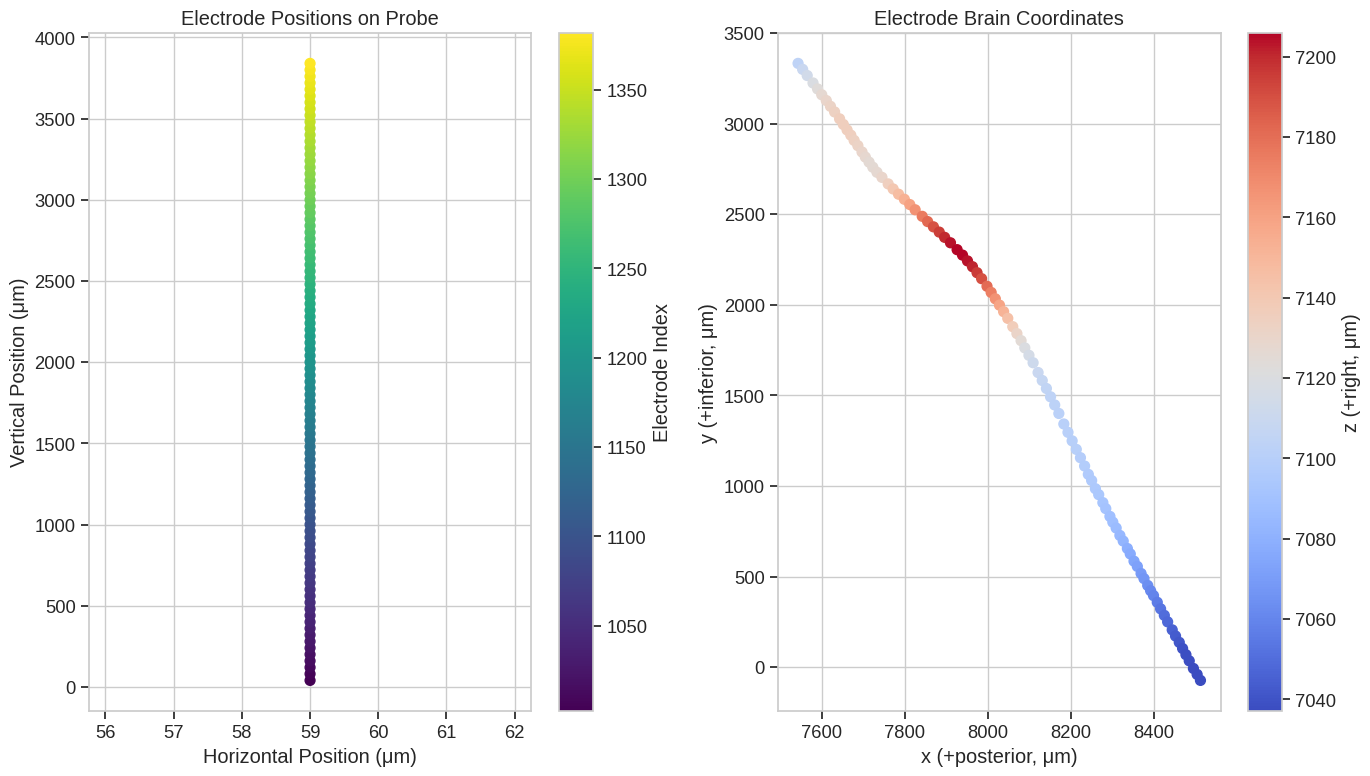

In [14]:
# Plot electrode locations (x, y, z coordinates)
fig, ax = plt.subplots(1, 2, figsize=(14, 8))

# 1. Probe layout (vertical and horizontal positions)
sc = ax[0].scatter(
    electrodes_df['probe_horizontal_position'], 
    electrodes_df['probe_vertical_position'],
    c=electrodes_df.index,
    cmap='viridis',
    s=50
)
ax[0].set_xlabel('Horizontal Position (μm)')
ax[0].set_ylabel('Vertical Position (μm)')
ax[0].set_title('Electrode Positions on Probe')
fig.colorbar(sc, ax=ax[0], label='Electrode Index')

# 2. Brain coordinates (x, y coordinates)
sc = ax[1].scatter(
    electrodes_df['x'], 
    electrodes_df['y'],
    c=electrodes_df['z'],
    cmap='coolwarm',
    s=50
)
ax[1].set_xlabel('x (+posterior, μm)')
ax[1].set_ylabel('y (+inferior, μm)')
ax[1].set_title('Electrode Brain Coordinates')
fig.colorbar(sc, ax=ax[1], label='z (+right, μm)')

plt.tight_layout()
plt.show()

Let's also look at the brain regions where the electrodes are located:

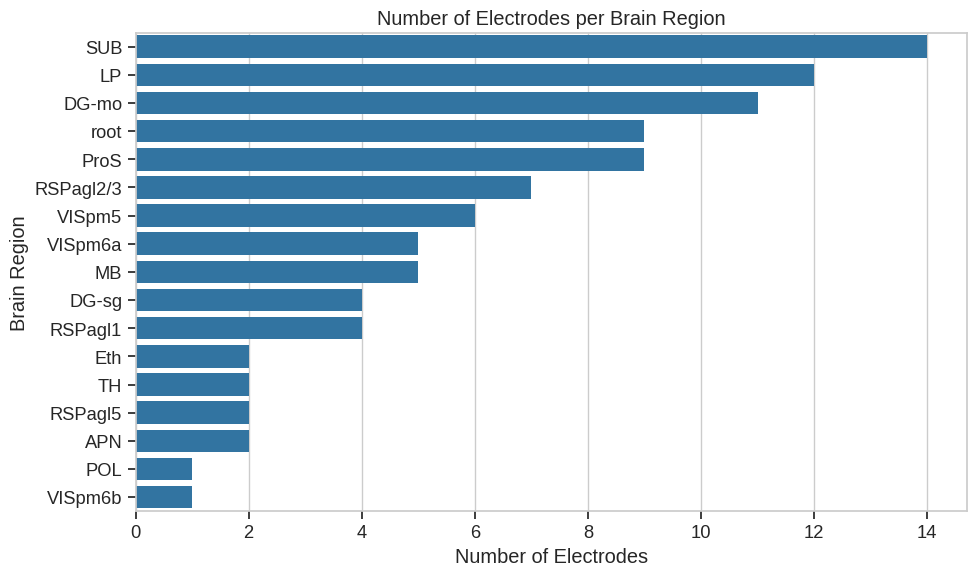

In [15]:
# Count electrodes by brain region
region_counts = electrodes_df['location'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=region_counts.values, y=region_counts.index)
plt.xlabel('Number of Electrodes')
plt.ylabel('Brain Region')
plt.title('Number of Electrodes per Brain Region')
plt.tight_layout()
plt.show()

## Visualizing LFP Data

Let's visualize some of the LFP data:

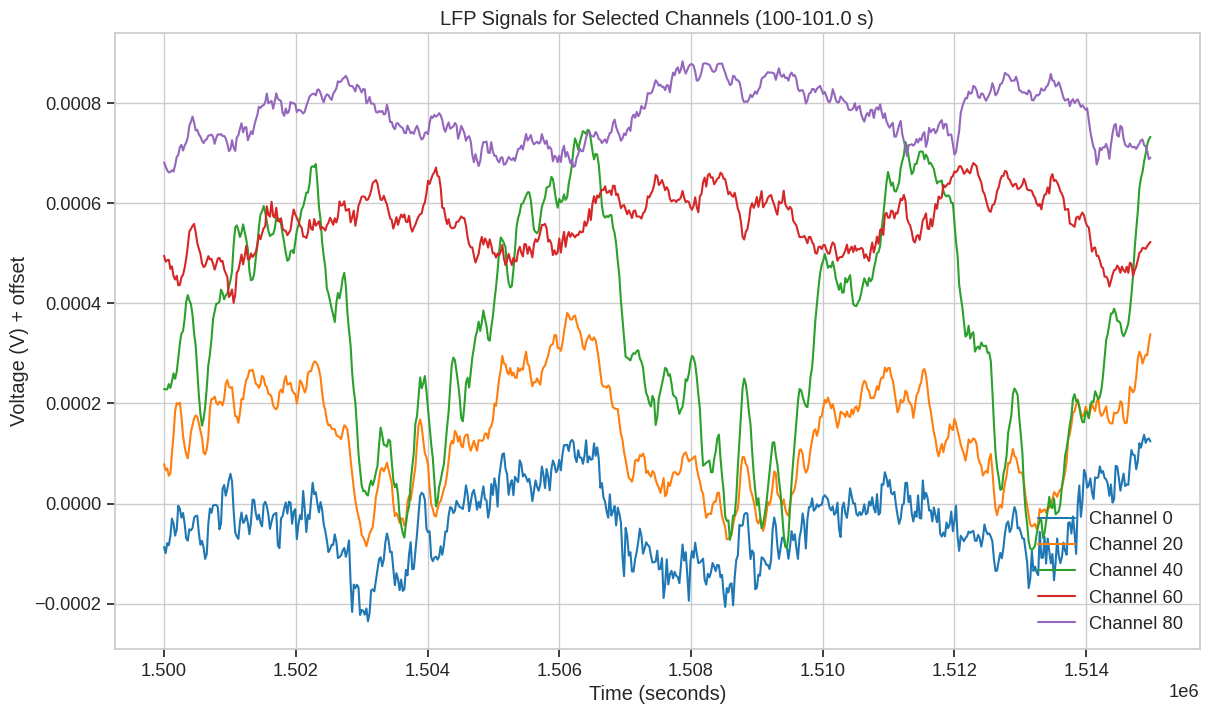

In [16]:
# Plot LFP data for a few channels and a short time window
# First, get a sample of the data
sample_duration = 1.0  # 1 second of data
sampling_rate = electrode_group.lfp_sampling_rate  # Hz
sample_points = int(sample_duration * sampling_rate)
start_time = 100  # Start at 100 seconds into the recording
start_idx = int(start_time * sampling_rate)
end_idx = start_idx + sample_points

# Select a subset of channels to plot (5 channels)
channels_to_plot = [0, 20, 40, 60, 80]

# Get the data and timestamps for the selected window
sample_data = lfp_data.data[start_idx:end_idx, channels_to_plot]
sample_times = lfp_data.timestamps[start_idx:end_idx]

# Plot the data
plt.figure(figsize=(14, 8))
for i, channel in enumerate(channels_to_plot):
    # Offset each channel for visibility
    offset = i * 200e-6  # 200 microvolts offset
    plt.plot(sample_times, sample_data[:, i] + offset, label=f'Channel {channel}')

plt.xlabel('Time (seconds)')
plt.ylabel('Voltage (V) + offset')
plt.title(f'LFP Signals for Selected Channels ({start_time}-{start_time+sample_duration} s)')
plt.legend()
plt.grid(True)
plt.show()

Let's create a heatmap to visualize LFP activity across all channels:

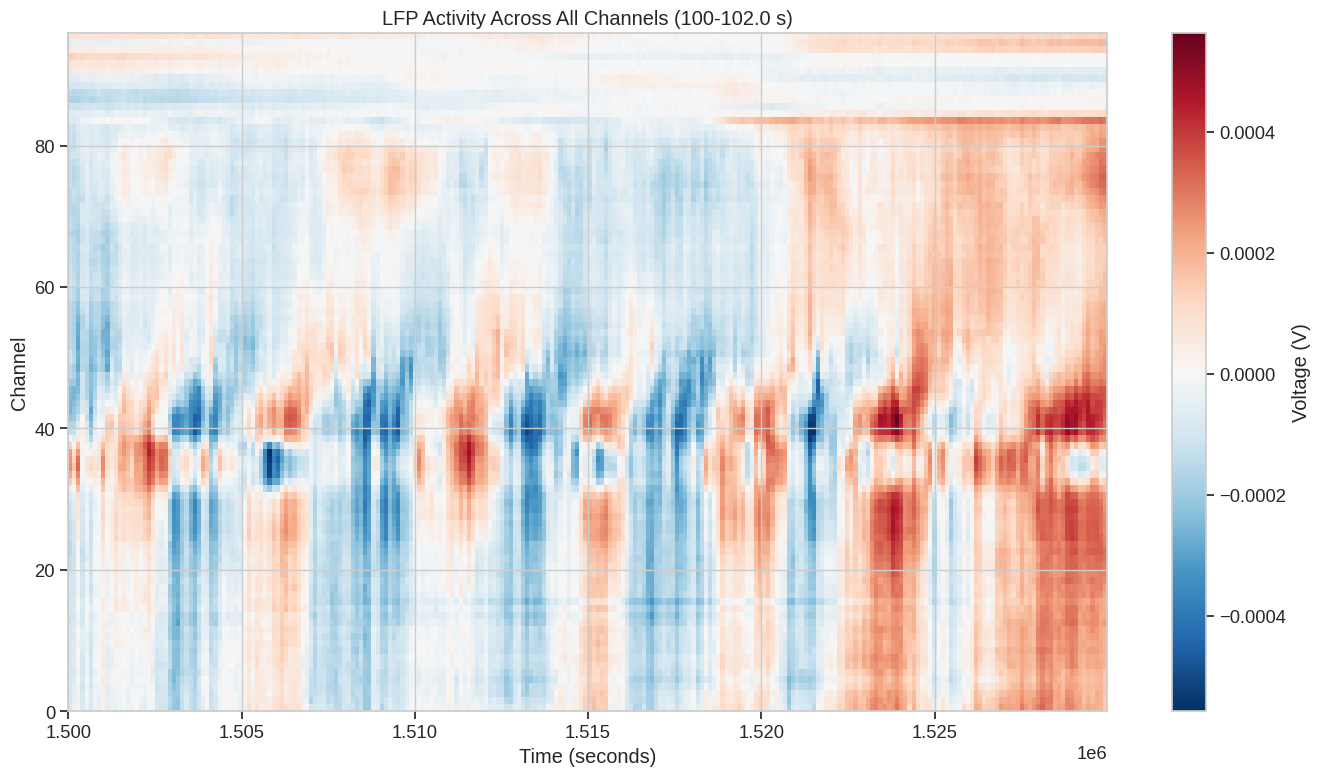

In [17]:
# Create a heatmap of LFP activity across all channels
# Get data for a short time window across all channels
window_duration = 2.0  # seconds
window_points = int(window_duration * sampling_rate)
window_start_time = 100  # seconds
window_start_idx = int(window_start_time * sampling_rate)
window_end_idx = window_start_idx + window_points

# Get the data
window_data = lfp_data.data[window_start_idx:window_end_idx, :]
window_times = lfp_data.timestamps[window_start_idx:window_end_idx]

# Create a downsampling factor to make the heatmap more manageable
downsample = 5
downsampled_data = window_data[::downsample, :]
downsampled_times = window_times[::downsample]

# Plot heatmap
plt.figure(figsize=(14, 8))
plt.imshow(
    downsampled_data.T, 
    aspect='auto', 
    extent=[window_times[0], window_times[-1], 0, window_data.shape[1]],
    cmap='RdBu_r',
    origin='lower'
)
plt.colorbar(label='Voltage (V)')
plt.xlabel('Time (seconds)')
plt.ylabel('Channel')
plt.title(f'LFP Activity Across All Channels ({window_start_time}-{window_start_time+window_duration} s)')
plt.tight_layout()
plt.show()

## Time-Frequency Analysis of LFP Data

Let's perform a simple time-frequency analysis on a single LFP channel to visualize
the spectral content of the signal:

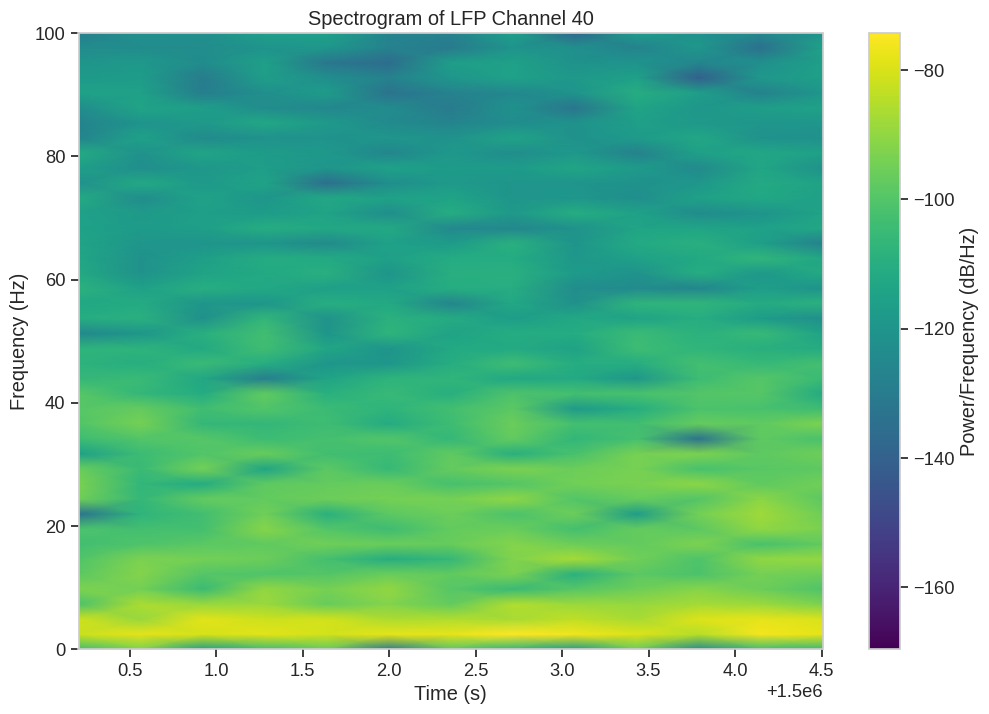

In [18]:
from scipy import signal

# Select a single channel for spectral analysis
channel_idx = 40
sample_data_single = lfp_data.data[start_idx:start_idx+int(5*sampling_rate), channel_idx]
sample_times_single = lfp_data.timestamps[start_idx:start_idx+int(5*sampling_rate)]

# Calculate the spectrogram
fs = sampling_rate  # Sampling frequency
nperseg = 256  # Length of each segment
f, t, Sxx = signal.spectrogram(sample_data_single, fs=fs, nperseg=nperseg)

# Plot the spectrogram
plt.figure(figsize=(12, 8))
plt.pcolormesh(t + sample_times_single[0], f, 10 * np.log10(Sxx), shading='gouraud', cmap='viridis')
plt.ylabel('Frequency (Hz)')
plt.xlabel('Time (s)')
plt.colorbar(label='Power/Frequency (dB/Hz)')
plt.title(f'Spectrogram of LFP Channel {channel_idx}')
plt.ylim(0, 100)  # Limit to 0-100 Hz for better visualization of relevant frequencies
plt.show()

## Exploring Brain Region-Specific LFP Properties

Let's compare LFP characteristics across different brain regions by properly indexing:

/tmp/ipykernel_6869/1340467687.py:46: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


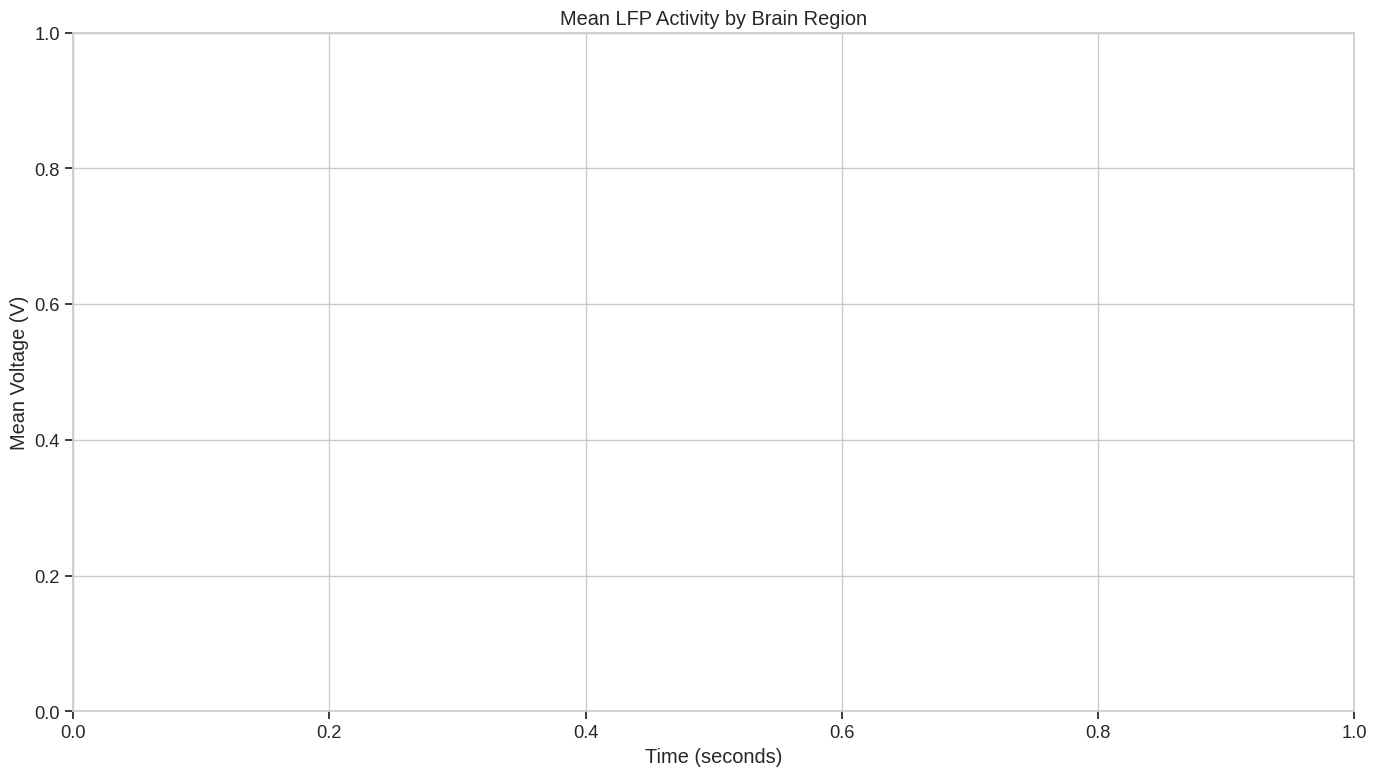

In [19]:
# Group channels by brain region
regions = electrodes_df['location'].unique()

# Create a mapping from region to valid channel indices
# We need to ensure these indices are valid for our LFP data (within 0-95)
valid_channel_indices = np.arange(lfp_data.data.shape[1])  # All valid indices (0-95)
region_channels = {}

for region in regions:
    # Get the indices in electrodes_df where location is this region
    region_rows = electrodes_df[electrodes_df['location'] == region].index.tolist()
    
    # Filter to only include indices that are valid for our LFP data
    valid_indices = [idx for idx in region_rows if idx in valid_channel_indices]
    region_channels[region] = valid_indices

# Select a subset of regions (max 5) with at least one valid channel
selected_regions = [region for region in regions 
                    if len(region_channels[region]) > 0][:5]

# Now we can safely compute and plot
window_data = lfp_data.data[window_start_idx:window_end_idx, :]

plt.figure(figsize=(14, 8))
for region in selected_regions:
    channels = region_channels[region]
    if not channels:
        continue
    
    # Only use valid channels
    valid_channels = [ch for ch in channels if ch < lfp_data.data.shape[1]]
    
    if not valid_channels:
        continue
        
    # Calculate mean across channels for this region
    region_mean = np.mean(window_data[:, valid_channels], axis=1)
    
    # Plot mean activity
    times = window_times - window_times[0]  # Zero-centered time
    plt.plot(times, region_mean, label=f'{region} (n={len(valid_channels)})')

plt.xlabel('Time (seconds)')
plt.ylabel('Mean Voltage (V)')
plt.title('Mean LFP Activity by Brain Region')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Alternative Regional Analysis: Using Electrode Properties

Let's try another approach to analyze LFP by brain region, using the properties
of electrodes directly:

Brain regions and electrode counts:
location
SUB          14
LP           12
DG-mo        11
root          9
ProS          9
RSPagl2/3     7
VISpm5        6
VISpm6a       5
MB            5
DG-sg         4
RSPagl1       4
Eth           2
TH            2
RSPagl5       2
APN           2
POL           1
VISpm6b       1
Name: count, dtype: int64


/tmp/ipykernel_6869/2295935406.py:32: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


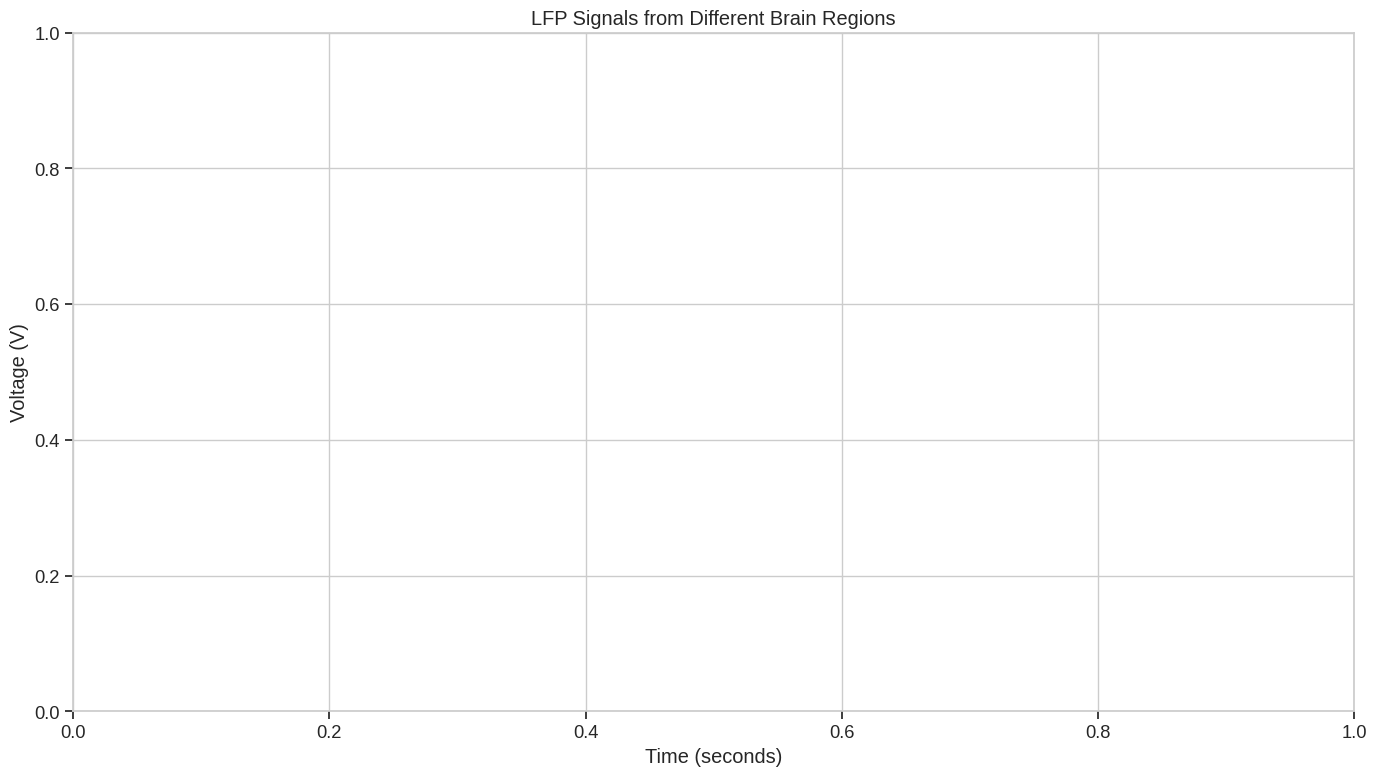

In [20]:
# Get a list of brain regions with electrode counts
brain_regions = electrodes_df['location'].value_counts()
print("Brain regions and electrode counts:")
print(brain_regions)

# Plot LFP for a few selected regions
plt.figure(figsize=(14, 8))

# Select up to 3 regions with the most electrodes
top_regions = brain_regions.index[:3]
for region in top_regions:
    # Get electrodes for this region
    region_electrode_indices = electrodes_df[electrodes_df['location'] == region].index
    
    # Make sure the indices are within range of available channels (0-95)
    valid_indices = [idx for idx in region_electrode_indices if idx < lfp_data.data.shape[1]]
    
    if not valid_indices:
        continue
    
    # Select one channel from this region to display
    sample_idx = valid_indices[0] if valid_indices else None
    
    if sample_idx is not None:
        # Get LFP data for this channel
        region_data = lfp_data.data[start_idx:end_idx, sample_idx]
        plt.plot(sample_times, region_data, label=f'{region} (channel {sample_idx})')

plt.xlabel('Time (seconds)')
plt.ylabel('Voltage (V)')
plt.title('LFP Signals from Different Brain Regions')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Summary

In this notebook, we've explored Dandiset 000563, which contains Neuropixels recordings from the Allen Institute's OpenScope platform focused on "temporal barcoding".

We've learned:

1. The dataset contains recordings from 14 mice, with electrodes implanted in various brain regions to capture responses to visual stimuli.

2. Each recording includes LFP data across multiple probes, with a sampling rate of 625 Hz.

3. The electrodes are distributed across multiple brain regions, allowing for comparison of visual responses across different parts of the visual system.

4. The dataset's focus on temporal precision in response to white noise stimuli (creating "barcode"-like patterns) makes it valuable for studying neural coding strategies.

For further exploration, researchers might consider:

- Comparing responses across different visual areas
- Analyzing the temporal precision of neural responses to different stimulus types
- Examining differences in LFP spectral properties across brain regions
- Investigating the relationship between neural activity and the specific features of the white noise stimuli